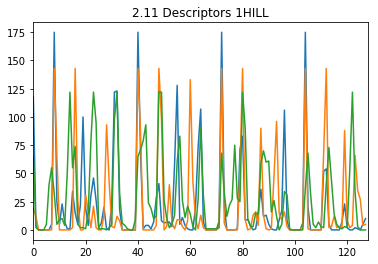

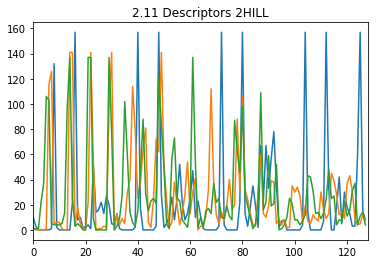

Num keypoints 1HILL: 1254
Num keypoints 2HILL: 1472


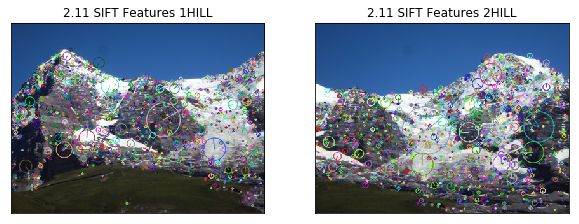

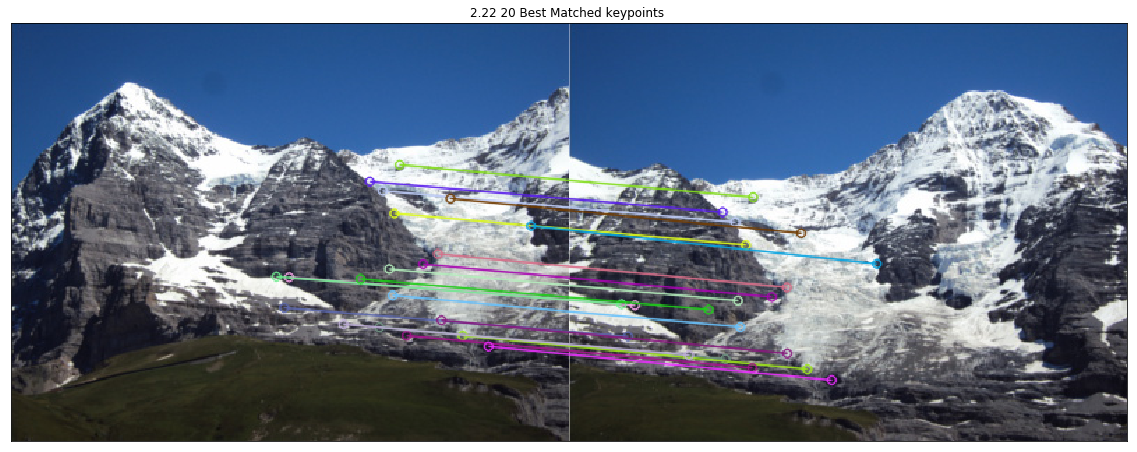

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#2 Image Stitching 
#2.11 SIFT Keypoints and Descriptors 

# load images
img = cv2.imread("1Hill.JPG")
img2 = cv2.imread("2Hill.JPG")

# copy images
img_disp = img.copy()
img2_disp=img2.copy()

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_disp = cv2.cvtColor(img2_disp, cv2.COLOR_BGR2RGB)

# create a SIFT object
sift1 = cv2.xfeatures2d.SIFT_create()


# detect SIFT features, with no masks
keypoints = sift1.detect(img, None)
keypoints2 = sift1.detect(img2, None)

# compute SIFT descriptors
keypoints, descriptors = sift1.compute(img, keypoints)
keypoints2, descriptors2 = sift1.compute(img2, keypoints2)

#2.22 create BFMatcher object
bf = cv2.BFMatcher() 
# Match descriptors.
matches = bf.match(descriptors,descriptors2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw 20 matches.
img3 = cv2.drawMatches(img,keypoints,img2,keypoints2, matches[:20], img , flags=2)
#end of 2.22

# draw the keypoints
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img2, keypoints2, img2_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# plot a couple of SIFT descriptors
num = 3
for i in range(num):
    # plot the 256x1 np array using matplotlib plot()
    plt.plot(descriptors[i])
    plt.title("2.11 Descriptors 1HILL")
    plt.xlim([0,128]) # set x-axis limit
plt.show()
num = 3
for i in range(num):
    # plot the 256x1 np array using matplotlib plot()
    plt.plot(descriptors2[i])
    plt.title("2.11 Descriptors 2HILL")
    plt.xlim([0,128]) # set x-axis limit
plt.show()

#display number of keypoints
print('Num keypoints 1HILL: '+ str(len(keypoints)))
print('Num keypoints 2HILL: '+ str(len(keypoints2)))


# display
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_disp)
plt.title("2.11 SIFT Features 1HILL"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2_disp)
plt.title("2.11 SIFT Features 2HILL"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.title("2.22 20 Best Matched keypoints "), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:

def warpPerspectivePadded(
        src, dst_shape, M):
    """Performs an affine or Euclidean/rigid warp with padding.
    Parameters
    ----------
    src : image to be warped.
    dst : shape of static image i.e. dst.shape 
    M : `3x3` Homography matrix.
    Returns
    -------
    src_warped : padded and warped source image
    """
    
    # it is enough to find where the corners of the image go to find
    # the padding bounds; points in clockwise order from origin
    _, src_w = src.shape[:2]
    lin_pts = np.array([
        [0, src_w],
        [0, 0]])
    # transform points
    transf_lin_pts = M[:, :2].dot(lin_pts) + M[:, 2].reshape(3, 1)

    # find min and max points
    min_x = np.floor(np.min(transf_lin_pts)).astype(int)
    max_x = np.ceil(np.max(transf_lin_pts)).astype(int)

    # add translation to the transformation matrix to shift to positive values
    anchor_x = 0
    if min_x < 0:
        anchor_x = -min_x
    shifted_transf = M + [[0, 0, anchor_x], [0, 0, 0], [0, 0, 0]]

    # create padded destination image
    dst_h, dst_w,_ = dst_shape
    dst_pad_w = anchor_x + dst_w + max(max_x, dst_w) - dst_w
    src_warped = cv2.warpPerspective(src, shifted_transf, (dst_pad_w, dst_h), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    return src_warped

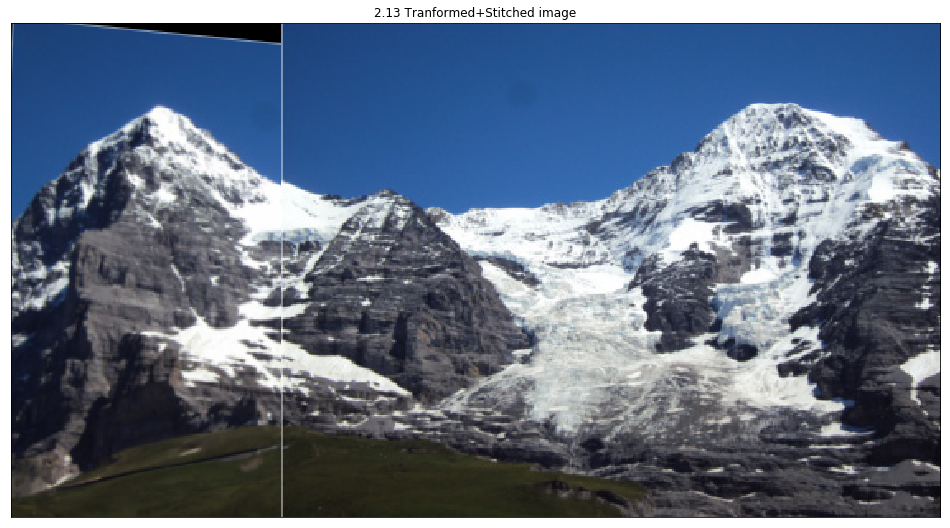

In [9]:
#2.23 Image Stitching 

import cv2
import numpy as np
import matplotlib.pyplot as plt

imgl = cv2.imread('1Hill.JPG')
imgr = cv2.imread('2Hill.JPG')

#convert to RGB
imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

#create sift object
sift_obj = cv2.xfeatures2d.SIFT_create()
# Compute keypoints and descriptors in one command
keypoints_l, descriptors_l = sift_obj.detectAndCompute(imgl, None)
keypoints_r, descriptors_r = sift_obj.detectAndCompute(imgr, None)

# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors from two images
matches = bf.match(descriptors_l,descriptors_r)

# Sort them in the order of their distance, to have best matches on top.
matches = sorted(matches, key = lambda x:x.distance)

# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    GoodMatches.append((m.queryIdx, m.trainIdx))

mpr = np.float32([keypoints_r[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_l[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly
H, __ = cv2.findHomography(mpl, mpr, cv2.RANSAC, 4)

#Warp according to Homography 
wimg= warpPerspectivePadded(imgl, imgr.shape, H)

#Replace second half of wimg array elements with imgr 
wimg[:,wimg.shape[1] - imgl.shape[1]:,:] = imgr


plt.figure(figsize=(20,20))

plt.subplot(212)
plt.imshow(wimg)
plt.title("2.13 Tranformed+Stitched image"), plt.xticks([]), plt.yticks([])
plt.show()

(300, 564, 3)
(300, 564, 3)


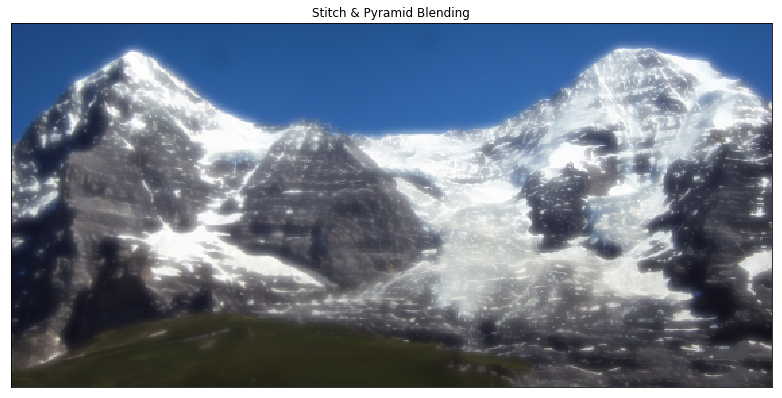

In [10]:
#2.14 Pyramid Image Blending 
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgl = cv2.imread('1Hill.JPG')
imgr = cv2.imread('2Hill.JPG')

imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

# Compute keypoints and descriptors in one command
sift_obj = cv2.xfeatures2d.SIFT_create()
keypoints_l, descriptors_l = sift_obj.detectAndCompute(imgl, None)
keypoints_r, descriptors_r = sift_obj.detectAndCompute(imgr, None)

# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.match(descriptors_l,descriptors_r)

# Sort them in the order of their distance, to find best matches on top.
matches = sorted(matches, key = lambda x:x.distance)

# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    GoodMatches.append((m.queryIdx, m.trainIdx))

mpr = np.float32([keypoints_r[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_l[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly
H, __ = cv2.findHomography(mpl, mpr, cv2.RANSAC, 4)
#Warp according to Homography 
wimg = warpPerspectivePadded(imgl, imgr.shape, H)

imgr = cv2.copyMakeBorder(imgr, 0, 0, 0, 164, cv2.BORDER_CONSTANT)
height, width = imgr.shape[0:2]
tx, ty = 164, 0 
M = np.float32([[1,0,tx],[0,1,ty]])
imgr = cv2.warpAffine(imgr, M, (width,height))


print(wimg.shape)
print(imgr.shape)
#PYRAMID BLENDING
# parameters
g_size = 255  # gaussian mask blur size
depth = 3  # pyramid depth size

""" PYRAMID BLENDING """
row, col, dpt = wimg.shape
# generate Gaussian pyramid for Warped image
G = wimg.copy()
gp1 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp1.append(G)

# generate Gaussian pyramid for Hill2 
G = imgr.copy()
gp2 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp2.append(G)
    
# generate Laplacian pyramid for wImg
lp1 = [gp1[depth-1]]  # store last gaussian image for top of lp pyramid (Ln=Gn)
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp1[i], dstsize=(gp1[i-1].shape[1], gp1[i-1].shape[0]))
    lp = cv2.subtract(gp1[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp1.append(lp)

# generate Laplacian pyramid for Hill2
lp2 = [gp2[depth-1]]  # store last gaussian image for top of lp pyramid
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp2[i], dstsize=(gp2[i-1].shape[1], gp2[i-1].shape[0]))
    lp = cv2.subtract(gp2[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp2.append(lp)

# build Gaussian pyramid from selected region
mask = np.zeros((wimg.shape[0], wimg.shape[1]))


# create mask
mask[:, 250:] = 1
# blur mask
mask = cv2.GaussianBlur(mask, (g_size, g_size), 0)
# generate Gaussian pyramid
G = mask.copy()
GR = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    GR.append(G) 

# add left and right halves of images in each level using Gaussian mask
LP_mask = []
i = 1
for la, lb in zip(lp1, lp2):
    idx = depth - i
#.reshape(GR[idx].shape[0],GR[idx].shape[1],1)
    # Now blend
    lp = (1-GR[idx].reshape(GR[idx].shape[0],GR[idx].shape[1],1)) * la + \
         GR[idx].reshape(GR[idx].shape[0],GR[idx].shape[1],1) * lb
    lp = np.uint8(lp)  # convert back to uint8
    LP_mask.append(lp)
    i += 1
    
# now Gaussian mask reconstruct
rs_mask = LP_mask[0]
for i in range(1, depth):
    rs_mask = cv2.pyrUp(rs_mask)  # upsample current lp image
    rs_mask = cv2.add(rs_mask, LP_mask[i])  # add lp image

rs_mask = cv2.cvtColor(rs_mask, cv2.COLOR_BGR2RGB)

#crop
rs_mask=rs_mask[30:,:]
    
# display results
plt.figure(figsize=(30,30))
plt.subplot(122), plt.imshow(cv2.cvtColor(rs_mask, cv2.COLOR_RGB2BGR))
plt.title('Stitch & Pyramid Blending'), plt.xticks([]), plt.yticks([])
plt.show()

(300, 564, 3)
(300, 564, 3)
Num keypoints 12HILL: 964
Num keypoints 3HILL: 867


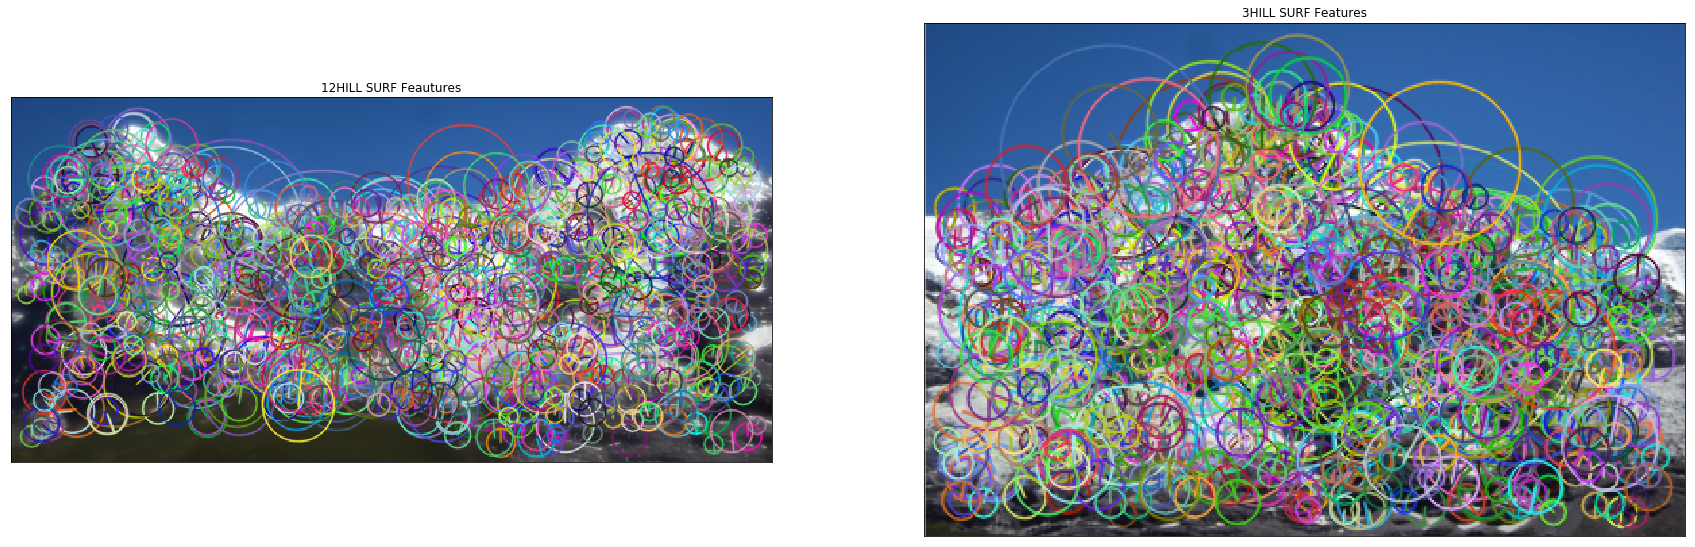

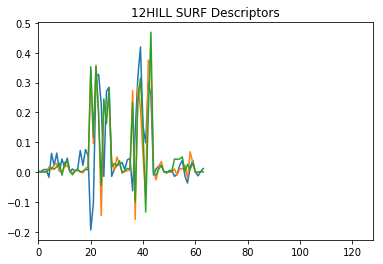

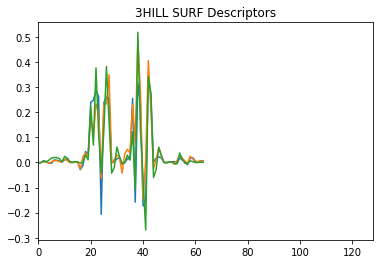

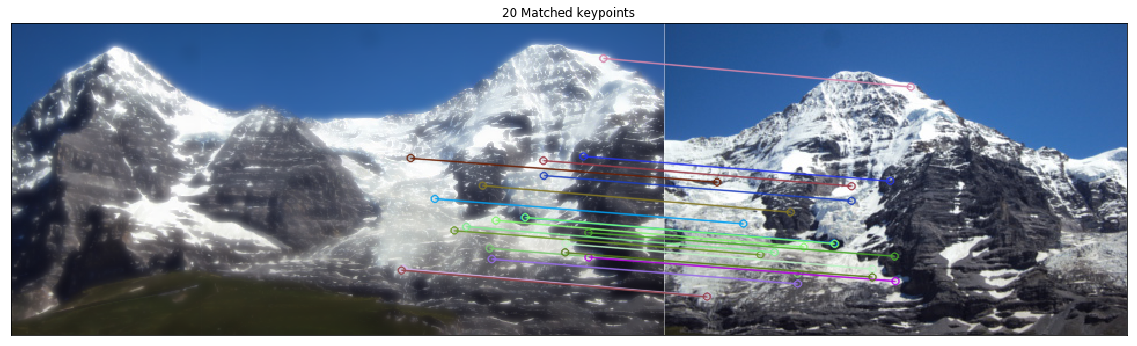

In [11]:
#2 Image Stitching PART2

import cv2
import numpy as np
import matplotlib.pyplot as plt

##############################COPY CODE FROM PREV QUESTION######################################
imgl = cv2.imread('1Hill.JPG')
imgr = cv2.imread('2Hill.JPG')

imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

# Compute keypoints and descriptors in one command
sift_obj = cv2.xfeatures2d.SIFT_create()
keypoints_l, descriptors_l = sift_obj.detectAndCompute(imgl, None)
keypoints_r, descriptors_r = sift_obj.detectAndCompute(imgr, None)

# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.match(descriptors_l,descriptors_r)

# Sort them in the order of their distance, to find best matches on top.
matches = sorted(matches, key = lambda x:x.distance)

# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    GoodMatches.append((m.queryIdx, m.trainIdx))

mpr = np.float32([keypoints_r[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_l[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly
H, __ = cv2.findHomography(mpl, mpr, cv2.RANSAC, 4)
#Warp according to Homography 
wimg = warpPerspectivePadded(imgl, imgr.shape, H)

imgr = cv2.copyMakeBorder(imgr, 0, 0, 0, 164, cv2.BORDER_CONSTANT)
height, width = imgr.shape[0:2]
tx, ty = 164, 0 
M = np.float32([[1,0,tx],[0,1,ty]])
imgr = cv2.warpAffine(imgr, M, (width,height))


print(wimg.shape)
print(imgr.shape)
#PYRAMID BLENDING
# parameters
g_size = 255  # gaussian mask blur size
depth = 3  # pyramid depth size

""" PYRAMID BLENDING """
row, col, dpt = wimg.shape
# generate Gaussian pyramid for Warped image
G = wimg.copy()
gp1 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp1.append(G)

# generate Gaussian pyramid for Hill2 
G = imgr.copy()
gp2 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp2.append(G)
    
# generate Laplacian pyramid for wImg
lp1 = [gp1[depth-1]]  # store last gaussian image for top of lp pyramid (Ln=Gn)
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp1[i], dstsize=(gp1[i-1].shape[1], gp1[i-1].shape[0]))
    lp = cv2.subtract(gp1[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp1.append(lp)

# generate Laplacian pyramid for Hill2
lp2 = [gp2[depth-1]]  # store last gaussian image for top of lp pyramid
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp2[i], dstsize=(gp2[i-1].shape[1], gp2[i-1].shape[0]))
    lp = cv2.subtract(gp2[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp2.append(lp)

# build Gaussian pyramid from selected region
mask = np.zeros((wimg.shape[0], wimg.shape[1]))


# create mask

mask[:, 250:] = 1
# blur mask
mask = cv2.GaussianBlur(mask, (g_size, g_size), 0)
# generate Gaussian pyramid
G = mask.copy()
GR = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    GR.append(G) 

# add left and right halves of images in each level using Gaussian mask
LP_mask = []
i = 1
for la, lb in zip(lp1, lp2):
    idx = depth - i
#.reshape(GR[idx].shape[0],GR[idx].shape[1],1)
    # Now blend
    lp = (1-GR[idx].reshape(GR[idx].shape[0],GR[idx].shape[1],1)) * la + \
         GR[idx].reshape(GR[idx].shape[0],GR[idx].shape[1],1) * lb
    lp = np.uint8(lp)  # convert back to uint8
    LP_mask.append(lp)
    i += 1
    
# now Gaussian mask reconstruct
rs_mask = LP_mask[0]
for i in range(1, depth):
    rs_mask = cv2.pyrUp(rs_mask)  # upsample current lp image
    rs_mask = cv2.add(rs_mask, LP_mask[i])  # add lp image

rs_mask = cv2.cvtColor(rs_mask, cv2.COLOR_BGR2RGB)

rs_mask=rs_mask[30:,:]
#########################################END OF COPIED CODE################################

#IMAGE STITCHING PART 2 
#2.11 SURF Keypoints & Descriptors

# load images, rs_mask is my blended image
img = rs_mask.copy()
img2= cv2.imread('3Hill.JPG')

#crop image2
img2=img2[30:,:]
# copy image
img_disp = img.copy()
img2_disp = img2.copy()

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_disp = cv2.cvtColor(img2_disp, cv2.COLOR_BGR2RGB)

# create SURF object
surf = cv2.xfeatures2d.SURF_create()

# detect SURF features
kypoints = surf.detect(img_gray, None)
kypoints2 = surf.detect(img2_gray, None)

#compute SURF descriptors
kypoints, dscriptors = surf.compute(img, kypoints)
kypoints2, dscriptors2 = surf.compute(img2, kypoints2)

# draw keypoints
cv2.drawKeypoints(img, kypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img2, kypoints2, img2_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print('Num keypoints 12HILL: '+ str(len(kypoints)))
print('Num keypoints 3HILL: '+ str(len(kypoints2)))
#2.22 Find Matching Keypoints and display best 20
# create BFMatcher object

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.

matches2 = bf.match(dscriptors,dscriptors2)
# Sort them in the order of their distance.
matches2 = sorted(matches2, key = lambda x:x.distance)

# Draw first(best) 20 matches.

img3 = cv2.drawMatches(img,kypoints,img2,kypoints2, matches2[:20], img, flags=2)



# display images
plt.figure(figsize=(30,30))

plt.subplot(121), plt.imshow(img_disp)
plt.title("12HILL SURF Feautures"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img2_disp)
plt.title("3HILL SURF Features"), plt.xticks([]), plt.yticks([])
plt.show()

# plot a couple of 1x128 SURF descriptors
num = 3
for i in range(num):
    # plot the 256x1 np array using matplotlib plot()
    plt.title("12HILL SURF Descriptors")
    plt.plot(dscriptors[i])
    plt.xlim([0,128]) # set x-axis limit
plt.show()

num = 3
for i in range(num):
    # plot the 256x1 np array using matplotlib plot()
    plt.title("3HILL SURF Descriptors")
    plt.plot(dscriptors2[i])
    plt.xlim([0,128]) # set x-axis limit
plt.show()

plt.figure(figsize=(20,20))

plt.imshow(img3)
plt.title("20 Matched keypoints"), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5,1,'Image Stitching Part2, Q2.13 Homography '),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

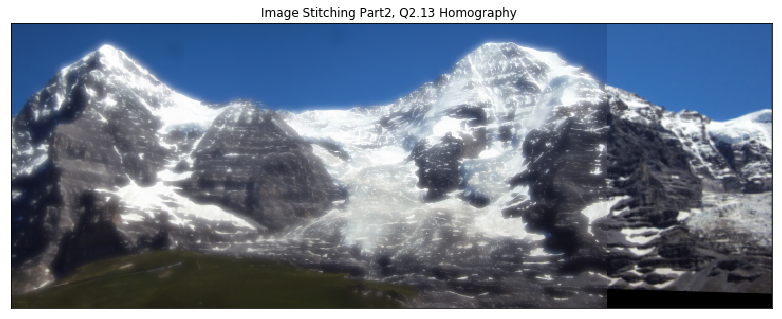

In [12]:
#STITCHING PART 2, 2.13 Homography using RANSAC 

import cv2
import numpy as np
import matplotlib.pyplot as plt

##############################COPY CODE FROM PREV QUESTION######################################
imgl = cv2.imread('1Hill.JPG')
imgr = cv2.imread('2Hill.JPG')

imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

# Compute keypoints and descriptors in one command
sift_obj = cv2.xfeatures2d.SIFT_create()
keypoints_l, descriptors_l = sift_obj.detectAndCompute(imgl, None)
keypoints_r, descriptors_r = sift_obj.detectAndCompute(imgr, None)

# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.match(descriptors_l,descriptors_r)

# Sort them in the order of their distance, to find best matches on top.
matches = sorted(matches, key = lambda x:x.distance)

# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    GoodMatches.append((m.queryIdx, m.trainIdx))

mpr = np.float32([keypoints_r[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_l[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly
H, __ = cv2.findHomography(mpl, mpr, cv2.RANSAC, 4)
#Warp according to Homography 
wimg = warpPerspectivePadded(imgl, imgr.shape, H)

imgr = cv2.copyMakeBorder(imgr, 0, 0, 0, 164, cv2.BORDER_CONSTANT)
height, width = imgr.shape[0:2]
tx, ty = 164, 0 
M = np.float32([[1,0,tx],[0,1,ty]])
imgr = cv2.warpAffine(imgr, M, (width,height))

#PYRAMID BLENDING
# parameters
g_size = 255  # gaussian mask blur size
depth = 3  # pyramid depth size

""" PYRAMID BLENDING """
row, col, dpt = wimg.shape
# generate Gaussian pyramid for Warped image
G = wimg.copy()
gp1 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp1.append(G)

# generate Gaussian pyramid for Hill2 
G = imgr.copy()
gp2 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp2.append(G)
    
# generate Laplacian pyramid for wImg
lp1 = [gp1[depth-1]]  # store last gaussian image for top of lp pyramid (Ln=Gn)
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp1[i], dstsize=(gp1[i-1].shape[1], gp1[i-1].shape[0]))
    lp = cv2.subtract(gp1[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp1.append(lp)

# generate Laplacian pyramid for Hill2
lp2 = [gp2[depth-1]]  # store last gaussian image for top of lp pyramid
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp2[i], dstsize=(gp2[i-1].shape[1], gp2[i-1].shape[0]))
    lp = cv2.subtract(gp2[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp2.append(lp)

# build Gaussian pyramid from selected region
mask = np.zeros((wimg.shape[0], wimg.shape[1]))


# create mask

mask[:, 250:] = 1
# blur mask
mask = cv2.GaussianBlur(mask, (g_size, g_size), 0)
# generate Gaussian pyramid
G = mask.copy()
GR = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    GR.append(G) 

# add left and right halves of images in each level using Gaussian mask
LP_mask = []
i = 1
for la, lb in zip(lp1, lp2):
    idx = depth - i
#.reshape(GR[idx].shape[0],GR[idx].shape[1],1)
    # Now blend
    lp = (1-GR[idx].reshape(GR[idx].shape[0],GR[idx].shape[1],1)) * la + \
         GR[idx].reshape(GR[idx].shape[0],GR[idx].shape[1],1) * lb
    lp = np.uint8(lp)  # convert back to uint8
    LP_mask.append(lp)
    i += 1
    
# now Gaussian mask reconstruct
rs_mask = LP_mask[0]
for i in range(1, depth):
    rs_mask = cv2.pyrUp(rs_mask)  # upsample current lp image
    rs_mask = cv2.add(rs_mask, LP_mask[i])  # add lp image

rs_mask = cv2.cvtColor(rs_mask, cv2.COLOR_BGR2RGB)

rs_mask=rs_mask[30:,:]

#IMAGE STITCHING PART 2 
#2.11 SURF Keypoints & Descriptors 
# load image
img = rs_mask.copy()
img2= cv2.imread('3Hill.JPG')

#crop image2
img2=img2[30:,:]
# copy image
img_disp = img.copy()
img2_disp = img2.copy()

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_disp = cv2.cvtColor(img2_disp, cv2.COLOR_BGR2RGB)

# create SURF object
surf = cv2.xfeatures2d.SURF_create()

# detect SURF features
kypoints = surf.detect(img_gray, None)
kypoints2 = surf.detect(img2_gray, None)

#compute SURFdescriptors
kypoints, dscriptors = surf.compute(img, kypoints)
kypoints2, dscriptors2 = surf.compute(img2, kypoints2)

# draw keypoints
cv2.drawKeypoints(img, kypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img2, kypoints2, img2_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#2.22 Find Matching Keypoints and display best 20
# create BFMatcher object

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.

matches2 = bf.match(dscriptors,dscriptors2)
# Sort them in the order of their distance.
matches2 = sorted(matches2, key = lambda x:x.distance)
# Draw first 20 matches.

img3 = cv2.drawMatches(img,kypoints,img2,kypoints2, matches2[:20], img, flags=2)
###########################################END OF COPIED CODE#####################################


# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches2):
    GoodMatches.append((m.trainIdx, m.queryIdx))

mpl = np.float32([kypoints[i].pt for (__, i) in GoodMatches])
mpr = np.float32([kypoints2[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly
H, __ = cv2.findHomography(mpr, mpl, cv2.RANSAC, 4)
weimg = cv2.warpPerspective(img2, H, (img2.shape[1]+img.shape[1],img2.shape[0]))

#combine 
weimg[0:img.shape[0],0:img.shape[1],:] = img
#crop x axis (black)
weimg=weimg[:,:720]

plt.figure(figsize=(30,30))
plt.subplot(121)
plt.imshow(weimg)
plt.title("Image Stitching Part2, Q2.13 Homography "), plt.xticks([]), plt.yticks([])



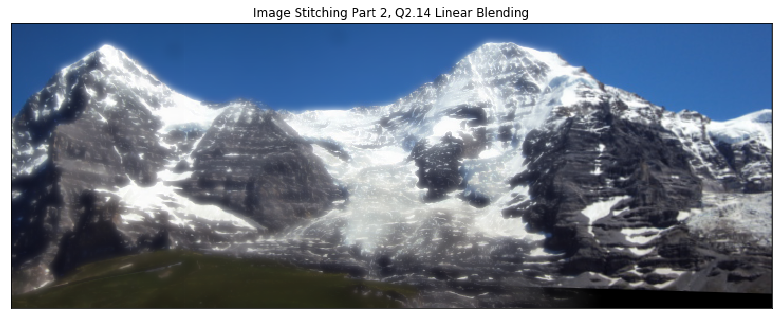

In [13]:
#STITCHING PART 2, 2.14 Linear Blending
import cv2
import numpy as np
import matplotlib.pyplot as plt

##############################COPY CODE FROM PREV QUESTION######################################
imgl = cv2.imread('1Hill.JPG')
imgr = cv2.imread('2Hill.JPG')

imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

# Compute keypoints and descriptors in one command
sift_obj = cv2.xfeatures2d.SIFT_create()
keypoints_l, descriptors_l = sift_obj.detectAndCompute(imgl, None)
keypoints_r, descriptors_r = sift_obj.detectAndCompute(imgr, None)

# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.match(descriptors_l,descriptors_r)

# Sort them in the order of their distance, to find best matches on top.
matches = sorted(matches, key = lambda x:x.distance)

# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    GoodMatches.append((m.queryIdx, m.trainIdx))

mpr = np.float32([keypoints_r[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_l[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly
H, __ = cv2.findHomography(mpl, mpr, cv2.RANSAC, 4)
#Warp according to Homography 
wimg = warpPerspectivePadded(imgl, imgr.shape, H)

imgr = cv2.copyMakeBorder(imgr, 0, 0, 0, 164, cv2.BORDER_CONSTANT)
height, width = imgr.shape[0:2]
tx, ty = 164, 0 
M = np.float32([[1,0,tx],[0,1,ty]])
imgr = cv2.warpAffine(imgr, M, (width,height))

#PYRAMID BLENDING
# parameters
g_size = 255  # gaussian mask blur size
depth = 3  # pyramid depth size

""" PYRAMID BLENDING """
row, col, dpt = wimg.shape
# generate Gaussian pyramid for Warped image
G = wimg.copy()
gp1 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp1.append(G)

# generate Gaussian pyramid for Hill2 
G = imgr.copy()
gp2 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp2.append(G)
    
# generate Laplacian pyramid for wImg
lp1 = [gp1[depth-1]]  # store last gaussian image for top of lp pyramid (Ln=Gn)
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp1[i], dstsize=(gp1[i-1].shape[1], gp1[i-1].shape[0]))
    lp = cv2.subtract(gp1[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp1.append(lp)

# generate Laplacian pyramid for Hill2
lp2 = [gp2[depth-1]]  # store last gaussian image for top of lp pyramid
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp2[i], dstsize=(gp2[i-1].shape[1], gp2[i-1].shape[0]))
    lp = cv2.subtract(gp2[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp2.append(lp)

# build Gaussian pyramid from selected region
mask = np.zeros((wimg.shape[0], wimg.shape[1]))


# create mask

mask[:, 250:] = 1
# blur mask
mask = cv2.GaussianBlur(mask, (g_size, g_size), 0)
# generate Gaussian pyramid
G = mask.copy()
GR = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    GR.append(G) 

# add left and right halves of images in each level using Gaussian mask
LP_mask = []
i = 1
for la, lb in zip(lp1, lp2):
    idx = depth - i
#.reshape(GR[idx].shape[0],GR[idx].shape[1],1)
    # Now blend
    lp = (1-GR[idx].reshape(GR[idx].shape[0],GR[idx].shape[1],1)) * la + \
         GR[idx].reshape(GR[idx].shape[0],GR[idx].shape[1],1) * lb
    lp = np.uint8(lp)  # convert back to uint8
    LP_mask.append(lp)
    i += 1
    
# now Gaussian mask reconstruct
rs_mask = LP_mask[0]
for i in range(1, depth):
    rs_mask = cv2.pyrUp(rs_mask)  # upsample current lp image
    rs_mask = cv2.add(rs_mask, LP_mask[i])  # add lp image

rs_mask = cv2.cvtColor(rs_mask, cv2.COLOR_BGR2RGB)

rs_mask=rs_mask[30:,:]

#IMAGE STITCHING PART 2 
#2.11 SURF Keypoints & Descriptors 
# load image
img = rs_mask.copy()
img2= cv2.imread('3Hill.JPG')

#crop image2
img2=img2[30:,:]
# copy image
img_disp = img.copy()
img2_disp = img2.copy()

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_disp = cv2.cvtColor(img2_disp, cv2.COLOR_BGR2RGB)

# create SURF object
surf = cv2.xfeatures2d.SURF_create()

# detect SURF features
kypoints = surf.detect(img_gray, None)
kypoints2 = surf.detect(img2_gray, None)

#compute SURFdescriptors
kypoints, dscriptors = surf.compute(img, kypoints)
kypoints2, dscriptors2 = surf.compute(img2, kypoints2)

# draw keypoints
cv2.drawKeypoints(img, kypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img2, kypoints2, img2_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#2.22 Find Matching Keypoints and display best 20
# create BFMatcher object

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.

matches2 = bf.match(dscriptors,dscriptors2)
# Sort them in the order of their distance.
matches2 = sorted(matches2, key = lambda x:x.distance)
# Draw first 20 matches.

img3 = cv2.drawMatches(img,kypoints,img2,kypoints2, matches2[:20], img, flags=2)

# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches2):
    GoodMatches.append((m.trainIdx, m.queryIdx))

mpl = np.float32([kypoints[i].pt for (__, i) in GoodMatches])
mpr = np.float32([kypoints2[i].pt for (i, __) in GoodMatches])
# find homography and wrap image accordingly
H, __ = cv2.findHomography(mpr, mpl, cv2.RANSAC, 4)
weimg = cv2.warpPerspective(img2, H, (img2.shape[1]+img.shape[1],img2.shape[0]))
#weimg[0:img.shape[0],0:img.shape[1],:] = img
#crop x axis (black)
weimg=weimg[:,:720]

#######################################COPIED CODE FROM PREV QUESTION #######################

#Stitching part 2- 2.24 Linear Blending

""" ALPHA BLENDING """
def Ramp(i_width, r_width, r_index, start, end):
    """
    Create alpha blending function
    :param i_width: img width
    :param r_width: ramp width
    :param r_index: center ramp index
    :param start: starting ramp value
    :param end: ending ramp value
    :return:
    """
    a = np.zeros((i_width))
    step = (end - start) / (r_width-1)
    idx = round(r_index - (r_width / 2))  # left side starting index of alpha ramp
    for i in range(r_width):
        a[idx] = start + step*i
        idx += 1
    a[idx:] = 1
    return a

# alpha blending ramp
ramp_size = 100  # alpha blending ramp size

# iwidth, r_width,center ramp index=510 (manually chosen value)
alpha = Ramp(weimg.shape[1], ramp_size, 510, 0, 1)

#padd img to allow blending, images of same size
img = cv2.copyMakeBorder(img, 0, 0, 0, 156, cv2.BORDER_CONSTANT)

#now blend
I_blend = (1-alpha.reshape(1,-1,1)) * img + alpha.reshape(1,-1,1)*weimg
I_blend = np.uint8(I_blend)  # convert back to uint8

plt.figure(figsize=(30,30))
plt.subplot(122),
plt.imshow(I_blend)
plt.title("Image Stitching Part 2, Q2.14 Linear Blending"), plt.xticks([]), plt.yticks([])
plt.show()


2.2 REASONINING QUESTIONS 

1. What are the differences between SIFT & SURF 

SIFT(Scale Invariant Feature Transform) includes both a detector and a decriptor, the detector is based on DoG (approximated la placian) and the descriptor is based on a histogram of gradient orientations. SIFT is intended to improve on feature detectors particularly being scale invariant.
SURF(Speeded Up Robust Feautures) is a fast approximation of SIFT, and can run up to 3-6 times faster with equivalent object identification quality, SURF uses Box Filters to approximate the DoG detector. SURF however is less robust to illumination and viewpoint changes. 

The following statistics are from the SIFT and SURF keypoints in the previous questions: 

SIFT: 
1HILL- 1254 Keypoints
2HILL- 1472 Keypoints 

SURF: 
12HILL- 964 Keypoints 
3HILL-867 Keypoints 

It is evident that SIFT detectors provide more keypoints for a given image, and thus, a higher density of keypoints. Looking at the keypoints in the previous questions it can be seen that the SIFT descriptor provides smaller circles, showing that it is denser.  

2. Discuss atleast 2 Pros & Cons of pyramid and linear blending techniques. When should one prefer pyramid blending over linear blending? 

 
PROS: 

PYRAMID:

-Low-frequency color variations are smoothly blended, while the higher-frequency textures on each fruit are blended more quickly to avoid “ghosting” effects when two textures are overlaid.

-Can be applied to arbitrary mask images.

-Can be extended to blend an arbitrary number of images in which the pixel origin is indicated by an integer value, particulary useful in image stitching and compositing where exposure varies.  

LINEAR(Feathering): 

-Simple to compute 

-Faster than pyramid blending. 


CONS: 

PYRAMID:

-Slower than linear blending

-More complex to implement, need to compute la placian pyramid estimation

LINEAR(Feathering):

-Exposure differences and scene movement can be very visible. 

-Blurring and ghosting can still be problems. 

-Could be difficult to choose optimum window. 

Pyramid blending is preffered over linear blending when one would like to avoid 'ghosting' affects in overlaying two textures, this would take longer + more complex to compute however will produce much better results. 


3. What would happen is a random subset of pairs of matching keypoints is used for finding homography? 

Since not all pairs of matching keypoints are 'good' matches, selecting a random subset of pairs could possibly result in those pairs being 'good' or 'bad' matches. Thus, it is possible that the randomly selected pairs infact lead to an accurate H matrix and result in proper warping, however, if the selected pairs are mostly 'bad' pairs, this will result in improper warping. For this reason it is ideal to choose the best pairs. 

4. Discuss the relationship between the number of matching keypoints used to finding homography and the accuracy of inferred homography. 

The number of matching keypoints do not neccesarily have a direct linear impact on the accuracy of the inferred homography, a larger number of 'good' matching keypoints would definately result in a more accurate homography and thus a more accurate 'warp'.
However, if we increase the number of matching keypoints we also increase the chance of choosing 'bad' matches would could infact result in a less-accurate homography.  
